# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

663d0b439aa4a1a9b7b87ea3e47ccfea


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

location = []
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
windspeed = []
record_counter = 0

for city in cities:
    
    response = requests.get(url+city).json()
    try:
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        location.append(city)
        record_counter = record_counter+1
        print(f"Processing record {record_counter} | {city}")
    except KeyError:
        print(f"{city} not found... skipping!")
              
print("-----------------------------------")
print(f"Query complete. {len(location)} imported!")
print("-----------------------------------")    

worldweather = {
    "city": location,
    "cloudiness": clouds,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": latitude,
    "long": longitude,
    "max temp": max_temp,
    "wind speed": windspeed
}

Processing record 1 | hilo
tsihombe not found... skipping!
Processing record 2 | longyearbyen
Processing record 3 | srednekolymsk
Processing record 4 | ribas do rio pardo
Processing record 5 | vaini
Processing record 6 | kologriv
Processing record 7 | provideniya
Processing record 8 | norman wells
Processing record 9 | atuona
Processing record 10 | saint-augustin
Processing record 11 | hamilton
Processing record 12 | jawa
Processing record 13 | busselton
Processing record 14 | bagotville
attawapiskat not found... skipping!
Processing record 15 | lompoc
Processing record 16 | bardstown
Processing record 17 | najran
Processing record 18 | sorland
Processing record 19 | ushuaia
Processing record 20 | bluff
Processing record 21 | luwuk
Processing record 22 | aklavik
Processing record 23 | east london
Processing record 24 | tirur
Processing record 25 | klaksvik
Processing record 26 | whitehorse
Processing record 27 | salta
Processing record 28 | ponta do sol
Processing record 29 | punta are

In [4]:
print(len(location))
print(len(clouds))
print(len(longitude))

547
547
547


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
worldweather_df = pd.DataFrame(worldweather)

worldweather_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
0,hilo,90,US,1578272660,58,19.71,-155.08,82.40,8.05
1,longyearbyen,64,NO,1578272713,59,78.22,15.63,-8.16,3.94
2,srednekolymsk,12,RU,1578272714,81,67.46,153.71,-10.25,3.09
3,ribas do rio pardo,31,BR,1578272714,61,-20.45,-53.76,75.36,6.17
4,vaini,75,IN,1578272714,82,15.34,74.49,68.00,4.70


In [6]:
csv_file = "worldweather.csv"
export_csv = worldweather_df.to_csv(csv_file)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

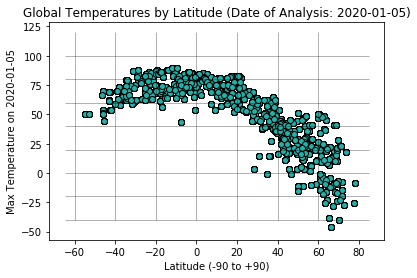

In [9]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["max temp"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")

todays_date = date.today()
#https://www.programiz.com/python-programming/datetime/current-datetime

plt.title(f"Global Temperatures by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Max Temperature on {todays_date}")

h_lines = np.arange(-40, 120, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, -40, 120, lw = 1, alpha = 0.3)

plt.savefig("global_temp_x_lat.png")

#### Latitude vs. Humidity Plot

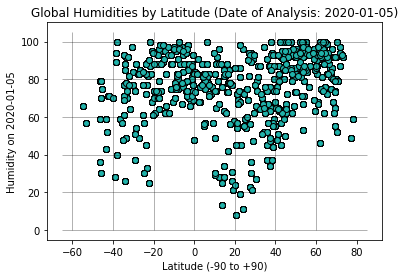

In [10]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["humidity"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Global Humidities by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Humidity on {todays_date}")

h_lines = np.arange(0, 105, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 105, lw = 1, alpha = 0.3)

plt.savefig("humidity_x_lat.png")

#### Latitude vs. Cloudiness Plot

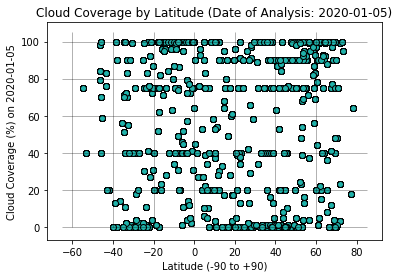

In [11]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["cloudiness"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Cloud Coverage by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Cloud Coverage (%) on {todays_date}")

h_lines = np.arange(0, 105, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 105, lw = 1, alpha = 0.3)

plt.savefig("cloud_cover_x_lat.png")

#### Latitude vs. Wind Speed Plot

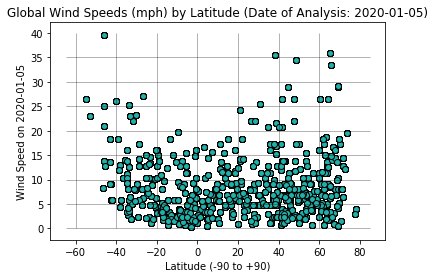

In [12]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["wind speed"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Global Wind Speeds (mph) by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Wind Speed on {todays_date}")

h_lines = np.arange(0, 40, 5)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 40, lw = 1, alpha = 0.3)

plt.savefig("wind_speed_x_lat.png")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

def regress(xfactor, yfactor):
    xfactor = xfactor.astype(float)
    yfactor = yfactor.astype(float)
    [slope, intercept, rvalue, pvalue, stderr] = linregress(xfactor, yfactor)
    print([slope, intercept, rvalue, pvalue, stderr])
    regress_values = xfactor * slope + intercept
    equation = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"The r-squared value is: {rvalue}")
    print(equation)
    plt.scatter(xfactor, yfactor, s=None, marker="o", color = "royalblue")
    plt.plot(xfactor, regress_values,"r-")
    plt.annotate(equation, (xfactor.mean(),yfactor.mean()), fontsize=15, color="red")
    plt.xlabel(xfactor.name)
    plt.ylabel(yfactor.name)
    plt.title(f"{xfactor.name} by {yfactor.name}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
#Note that this doesn't copy anything on the equator (if there is in fact anything on the equator in the dataset)
#https://stackoverflow.com/questions/36142959/pandas-move-rows-from-1-df-to-another-df?lq=1     
n_hemi_df = pd.DataFrame(columns=('city', 'cloudiness', 'country', 'date', 'humidity', 'lat', 'long', 'max temp', 'wind speed'))
s_hemi_df = pd.DataFrame(columns=worldweather_df.columns)

n_hemi_df = n_hemi_df.append(worldweather_df.loc[worldweather_df['lat']>0, :])
s_hemi_df = s_hemi_df.append(worldweather_df.loc[worldweather_df['lat']<0, :])

n_hemi_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
0,hilo,90,US,1578272660,58,19.71,-155.08,82.40,8.05
1,longyearbyen,64,NO,1578272713,59,78.22,15.63,-8.16,3.94
2,srednekolymsk,12,RU,1578272714,81,67.46,153.71,-10.25,3.09
4,vaini,75,IN,1578272714,82,15.34,74.49,68.00,4.70
5,kologriv,87,RU,1578272714,96,58.83,44.31,21.09,6.08


In [15]:
s_hemi_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
3,ribas do rio pardo,31,BR,1578272714,61,-20.45,-53.76,75.36,6.17
8,atuona,34,PF,1578272714,75,-9.80,-139.03,80.55,9.46
12,busselton,0,AU,1578272715,49,-33.64,115.35,77.00,3.00
13,bagotville,40,AU,1578272715,74,-28.98,153.42,84.20,17.22
18,ushuaia,75,AR,1578272716,66,-54.81,-68.31,50.00,26.40


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

[-1.219440311069629, 87.24285817807268, -0.8518107151134455, 1.5854452220247066e-104, 0.03925343922264507]
The r-squared value is: -0.8518107151134455
y = -1.22x + 87.24


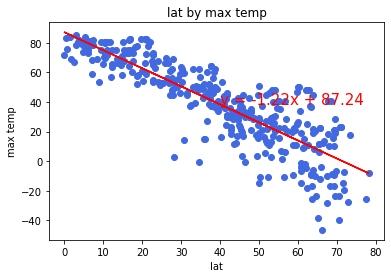

In [16]:
regress(n_hemi_df['lat'], n_hemi_df['max temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

[0.3475458836144624, 79.87380347634455, 0.48650605529700913, 4.3857823876084415e-12, 0.04678050464140278]
The r-squared value is: 0.48650605529700913
y = 0.35x + 79.87


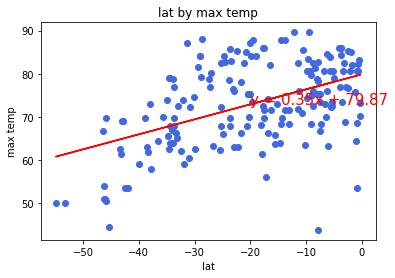

In [17]:
regress(s_hemi_df['lat'], s_hemi_df['max temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[0.3388125911344582, 62.85633672689916, 0.3540050309854656, 2.825552999639745e-12, 0.04685202668821772]
The r-squared value is: 0.3540050309854656
y = 0.34x + 62.86


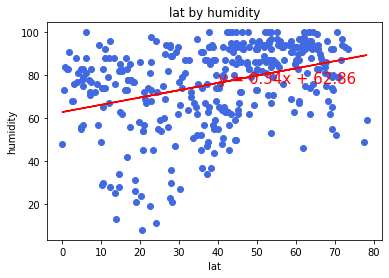

In [18]:
regress(n_hemi_df['lat'], n_hemi_df['humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

[0.5027545610022588, 86.27851446705202, 0.402464395370024, 2.135223491862539e-08, 0.08571293539268708]
The r-squared value is: 0.402464395370024
y = 0.5x + 86.28


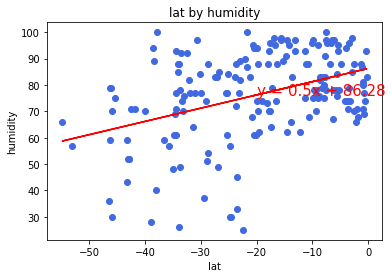

In [19]:
regress(s_hemi_df['lat'], s_hemi_df['humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[0.4565147412906033, 34.6989313919307, 0.23457357112295193, 5.572791641990468e-06, 0.09902378187912876]
The r-squared value is: 0.23457357112295193
y = 0.46x + 34.7


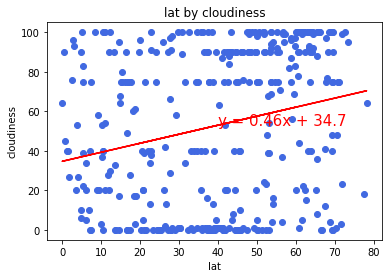

In [20]:
regress(n_hemi_df['lat'], n_hemi_df['cloudiness'])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

[0.46135402589531416, 68.78373819696814, 0.17540539006273492, 0.018512496369073737, 0.194086560438088]
The r-squared value is: 0.17540539006273492
y = 0.46x + 68.78


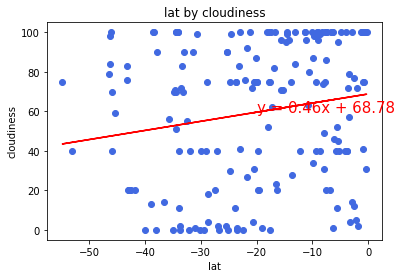

In [21]:
regress(s_hemi_df['lat'], s_hemi_df['cloudiness'])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[0.04220799247266948, 6.822669376258649, 0.13239844791160893, 0.01111942046255213, 0.01653960612698461]
The r-squared value is: 0.13239844791160893
y = 0.04x + 6.82


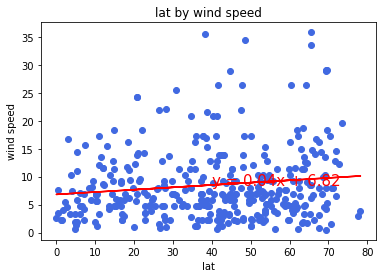

In [22]:
regress(n_hemi_df['lat'], n_hemi_df['wind speed'])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

[-0.233976483467411, 3.7162447201634965, -0.47440758124844723, 1.724854867353057e-11, 0.032541975328204506]
The r-squared value is: -0.47440758124844723
y = -0.23x + 3.72


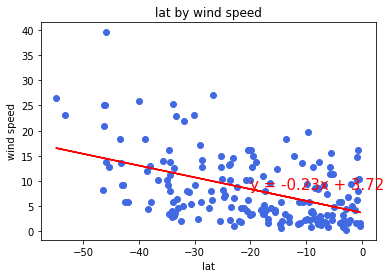

In [23]:
regress(s_hemi_df['lat'], s_hemi_df['wind speed'])